# An Introduction to Linear Regression

### Notebook created by [Bright Cape](https://brightcape.nl/)
*Author: Maurits Akkerman, Youp Suurmeijer*

# Contents

* [Introduction](#Introduction)

* [Step 1: Modelling (Linear Regression)](#Step-1:-Modelling-(Linear-Regression))
    
    - [Multiple Linear Regression](#1.1:-Multiple-Linear-Regression)
    
    - [Feature Selection and Model Comparison](#1.2:-Feature-Selection-and-Model-Comparison)

* [Step 2: Deployment (Conclusion)](#Step-2:-Deployment-(Conclusion))


## Introduction

[[ go back to the top ]](#Contents)

This notebook builts upon the previous [notebook](https://colab.research.google.com/github/MauritsAkkerman/AppliedDataScience/blob/main/Data%20Cleaning%20%26%20Visualization.ipynb) in which we discussed the exploratory analysis, data cleaning, and data understanding.

<img src="https://drive.google.com/uc?id=1yX1hvNeepHnm1O58voKm_qQultGcpNOy" style="width: 800px;" />

In this notebook, the modelling phase is discussed. We focus on predicting a target variable through the use of **linear regression**. The final phase of deployment and subsequent customer acceptance is not executed, though conclusions and next steps are discussed.

This notebook makes use of (a subset of) a public dataset of the Google Merchandise store. This is real-life data from Google Analytics and looks like something you might get from a company when asked to perform data science experiments using their webstore data. Note that therefore the examples might not always look as perfect as you might find in other online materials, but this is real-life data science, and you never get perfect data to start with.

### Motivation
This notebook is specifically focussed on linear regression modelling. But why are we learning linear regression? 
- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods

### Import Required Libraries

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this allows plots to appear directly in the notebook
%matplotlib inline

### Import Cleaned Dataset

In [2]:
import requests
from io import StringIO

orig_url='https://drive.google.com/file/d/1SJWwLTX6lHKP13A-PudfRnuN7s-_5vxy/view?usp=sharing'
dwn_url='https://drive.google.com/uc?export=download&id=' + orig_url.split('/')[-2]
url = requests.get(dwn_url).text
csv_raw = StringIO(url)

# Read the data into a pandas data frame and show the first 5 rows
data = pd.read_csv(csv_raw, index_col=0, sep=',')
data['date'] = pd.to_datetime(data['date'],  format='%Y-%m-%d', errors='coerce')
data.head()

,visitNumber,date,hits,pageviews,timeOnSite,totalTransactionRevenue,campaign,medium,browser,operatingSystem,isMobile,continent
0,1,2016-08-05,11,11,225.0,52.00,(not set),organic,Chrome,Chrome OS,0,Americas
1,1,2016-08-05,60,39,1848.0,83.99,(not set),(not set),Chrome,Linux,0,Americas
2,5,2016-08-05,40,29,2180.0,30.18,(not set),(not set),Chrome,Macintosh,0,Americas
3,1,2016-08-05,63,51,2407.0,29.19,(not set),(not set),Chrome,Macintosh,0,Americas
5,11,2016-08-05,47,34,1472.0,70.36,(not set),(not set),Chrome,Macintosh,0,Americas


# Step 1: Modelling (Linear Regression)
[[ go back to the top ]](#Contents)

Simple linear regression is an approach used to predict a quantitative response by using a single feature (or "predictor" or "input variable"). It takes the following form:

$ y = β_0 + β_1 \cdot x$

What does each term represent?

- $y$ is the target (or dependent) variable
- $x$ is the feature (or independent variable)
- $β_0$ is the intercept
- $β_1$ is the coefficient for x

Together, $β_0$ and $β_1$ are called the model coefficients. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

Let's use Statsmodels to estimate the model coefficients for the Google Analytics data:

In [3]:
import statsmodels.formula.api as smf

# create a fitted model in one line using ordinary least squares
lm = smf.ols(formula='totalTransactionRevenue ~  pageviews', data=data).fit()

# print the coefficients
lm.params

Intercept    2.380982
pageviews    2.191458
dtype: float64

### Interpreting Model Coefficients

How do we interpret the 'pageviews' coefficient ($β_1$)?

- A "unit" increase in page views is associated with a 2.19 "unit" increase in totalTransactionRevenue.
- Or more clearly: An additional page view results in 2.19 dollars extra revenue on average

Note that if an increase in page views was associated with a decrease in sales, $β_1$ would be negative.

### Using the Model for Prediction

Let's say that we have a current customer on our website with already 10 page views What would we predict for the Sales for that customer?

$y = β_0 + β_1 \cdot x$


$y = 2.38 + 2.19 \cdot 10$


In [4]:
# manually calculate the prediction
round(2.380982 + 2.191458 * 10,2)

24.3

Thus, we would predict Sales of $24.30 for that customer. 

----------------------------------------------
----------------------------------------------

We can draw more conclusions from these results, namely that the intercept is very high for webstore sales. An intercept means that even with zero pageviews a customer would spend $2.38 dollars. Since a webstore is known to have very low conversion percentages, in the range of 1-5%, this is a highly unlikely result. The high intercept could be explained by several factors. First, outliers are still affecting the results of the linear regression. Second, the conversion rate of the customers in the dataset is much higher than the industry standard.

The latter is the cause in this instance. The dataset provided is balanced, meaning the number of customers that bought an item is equal to the number of customers who did not buy anything. A balanced dataset can be usefull in certain scenario's but in this instance it gives a wrong representation of reality. Therefore, it would lead to the wrong conclusions.

Once again, business and data understanding is critical to any data science project. Without those two, the conclusions drawn from modelling can be misleading.

Nevertheless, we will continu to show how a linear regression model is created to provide an example of the general principles.

----------------------------------------------
----------------------------------------------

The python package Statsmodels can also make these predictions:

In [5]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'pageviews': [10]})
X_new.head()

,pageviews
0,10


In [6]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    24.295561
dtype: float64

### Plotting the Least Squares Line

Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least-squares line:

In [7]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'pageviews': [data['pageviews'].min(), data['pageviews'].max()]})
X_new.head()

,pageviews
0,1
1,89


In [8]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0      4.572440
1    197.420733
dtype: float64

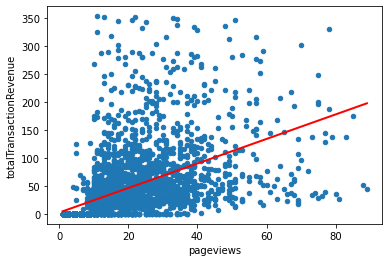

In [9]:
# first, plot the observed data
data.plot(kind='scatter', x='pageviews', y='totalTransactionRevenue')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2);

### How well does the model fit the data?

The most common way to evaluate the overall fit of a linear model is by the R-squared value. R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model. R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model.

Let's calculate the R-squared value for our simple linear model:


In [10]:
# print the R-squared value for the model
round(lm.rsquared,4)

0.3313

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for comparing different models.

## 1.1: Multiple Linear Regression
[[ go back to the top ]](#Contents)


Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

$y= β_0 + β_1 \cdot x_1 + ... +  β_n \cdot x_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = β_0 + β_1 \cdot$ visitNumber $ + β_2 \cdot $ pageviews $ + β_3 \cdot $ timeOnSite $ + β_4 \cdot $ isMobile

Let's make a multiple linear regression model in scikit-learn.

In [11]:
# create X and y
from sklearn.model_selection import train_test_split
# create a Python list of feature names
feature_cols = ["visitNumber", "pageviews", "timeOnSite", "isMobile"]


# use the list to select a subset of the original DataFrame
all_inputs = data[feature_cols]
all_labels = data["totalTransactionRevenue"]

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

Thus, we have 75% of the data available to train our model, which equates to 2415 rows, and the remaining 805 rows are used to test the performance of the trained model.

In [12]:
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(training_inputs, training_classes)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-2.700911283379291
[ 5.46651987e+00  1.88350760e+00  3.57555023e-03 -1.25664701e+01]


In [13]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm.coef_))

[('visitNumber', 5.4665198688309475),
 ('pageviews', 1.8835075959502652),
 ('timeOnSite', 0.0035755502290537753),
 ('isMobile', -12.566470069301074)]

$y = -2.701 + 5.467 \cdot $ visitNumber $ + 1.884 \cdot $ pageviews $ + 0.004 \cdot $ timeOnSite $ - 12.567 \cdot $ isMobile

How do we interpret the timeOnSite coefficient (0.004)?

For a given amount of "visitNumber" and "pageViews", a "unit" increase in "timeOnSite" is associated with a 0.004 "unit" increase in Sales.

Important notes:
This is a statement of association, not causation. If an increase in "timeOnSite" was associated with a decrease in sales, $\beta_1$ would be negative.

In [14]:
# calculate the R-squared
round(lm.score(testing_inputs, testing_classes),4)

0.359

## 1.2: Feature Selection and Model Comparison
[[ go back to the top ]](#Contents)

Which model gives us the best result, e.g. which combination of features provides the best response? 

Does hits "belong" in our model? In other words, does it improve the quality of our predictions?

Let's remove one or more features in the feature_cols below and check the R squared!

In [15]:
# create a Python list of feature names
feature_cols = ['pageviews', 'visitNumber', 'isMobile']

# use the list to select a subset of the original DataFrame
all_inputs = data[feature_cols]

# split into training and testing sets
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

# fit the model to the training data (learn the coefficients)
lm.fit(training_inputs, training_classes)

# make predictions on the testing set
predictions = lm.predict(testing_inputs)

# calculate the R-squared
round(lm.score(testing_inputs, testing_classes),4)

0.3586

### Comparing the Models
Based on the R-Squared value we can now compare the three models created.

1. Independent variables: "pageviews", R-Squared: 0.3313
3. Independent variables: "pageviews", "visitNumber", "isMobile", "timeOnSite" R-Squared: 0.3590
3. Independent variables: "pageviews", "visitNumber", "isMobile", R-Squared: 0.3586

The second model has the highest R-Squared and therefore is the preferred option. This example only shows three combinations of variables for multiple linear regression and serves as an example of feature selection. In reality multiple algorithmes and concepts exists that structurally apply feature selection to find the best predicting set of variables. These methods are vital when considering tens or hunderds of different prediction variables.

# Step 2: Deployment (Conclusion)

[[ go back to the top ]](#Contents)

As mentioned before, this notebook does not delve into the deployment phase. Though, we will revisit the original business case: 

> We're trying to predict the expected revenue (USD) from a webstore customer based on behavioral web statistics

We have performed one cycle of the data science lifecycle and have made a multiple regression model based on the number of page views and on the time spent on the website. Our Model has an R-Squared of 0.3590, but is that sufficient? Remember:

> Our company's Head of Data has no idea of the predictive power of our dataset but has told us to come up with a model with at least an R-squared of 0.6

Hence, the current model does not suffice with the success metric defined. Therefore, in the next iteration we should look to:
1. Include other variables, both from the current dataset as from other databases.
2. Acquire new data, either to fill in missing data or to expand upon the current rows available
3. Try other modelling approaches

Due to the extensive reporting on the preprocessing steps undertaken, we can communicate these with stakeholders to improve the incoming data for future projects.


### Machine learning notebook
In the next notebook we will apply some machine learning algorithms to the same dataset to see if they can outperform multiple linear regression.

* [Machine Learning Algorithms](https://colab.research.google.com/github/MauritsAkkerman/AppliedDataScience/blob/main/Machine%20Learning%20(Supervised%20Classification)%20Case.ipynb)
    
And if you want to look back at the data cleaning steps performed:

* [Data Cleaning](https://colab.research.google.com/github/MauritsAkkerman/AppliedDataScience/blob/main/Data%20Cleaning%20%26%20Visualization.ipynb)